# Large Population: Neutral *vs* Selection HIGH MUTATION RATE

# Analysis notebook

Due to the size of populations under a high mutation rate, the simulations were carried out in a separate notebook. This notebook analyzes the data of those simulations.

**Warning:** it might be necessary to first run the simulations if the data is not yet available.


The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
q (start)  | **0.1** | **0.1**|
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | $0$   |  $0.3$   |  

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [3]:
%ls Figures/

Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/
Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/
Large-MUTATOR-Neutral_vs_Selection-SAMPLED/
Large-Neutral_vs_Selection-SAMPLED/


## LOAD DATA

In [4]:
%ls High_mutrate-Simulation_data-sampled/

In [4]:
%%time
prefix = 'High_mutrate-Simulation_data-sampled/'

# neutral population
filepath_N = prefix + 'large_N_high_q_data.pkl.gz'
large_N_data = pd.read_pickle(filepath_N, compression='gzip')

# selective population
filepath_S = prefix + 'large_S_high_q_data.pkl.gz'
large_S_data = pd.read_pickle(filepath_S, compression='gzip')

CPU times: user 25.1 s, sys: 17.8 s, total: 42.9 s
Wall time: 54.4 s


In [5]:
%%time
prefix = 'High_mutrate-Simulation_data-sampled/'

# neutral population
filepath_N = prefix + 'sampled_large_N_high_q_data.pkl.gz'
large_N_data_sampled = pd.read_pickle(filepath_N, compression='gzip')

# selective population
filepath_S = prefix + 'sampled_large_S_high_q_data.pkl.gz'
large_S_data_sampled = pd.read_pickle(filepath_S, compression='gzip')

CPU times: user 220 ms, sys: 75.3 ms, total: 296 ms
Wall time: 342 ms


## Summary

### Original data

In [6]:
large_N_data.describe()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight
count,1.662935e+07,1.662935e+07,1.662935e+07,1.662935e+07,1.662935e+07,1.662935e+07,1.662935e+07,16629348.0
mean,3.357074e+01,1.000000e-01,6.999833e+00,2.101760e+01,1.805595e-07,2.859916e+00,9.999999e-01,1.0
std,1.863086e+00,2.404373e-11,3.782141e+03,2.902762e+04,2.493725e-04,1.335544e+00,6.302605e+02,0.0
min,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,3.300000e+01,1.000000e-01,1.000000e+00,1.000000e+00,8.590869e-09,2.000000e+00,0.000000e+00,1.0
50%,3.400000e+01,1.000000e-01,1.000000e+00,1.000000e+00,8.590869e-09,3.000000e+00,0.000000e+00,1.0
75%,3.500000e+01,1.000000e-01,2.000000e+00,3.000000e+00,2.577261e-08,4.000000e+00,0.000000e+00,1.0
max,3.500000e+01,1.000000e-01,1.492559e+07,1.164027e+08,1.000000e+00,1.200000e+01,2.487292e+06,1.0


In [7]:
large_S_data.describe()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight
count,1.662286e+07,1.662286e+07,1.662286e+07,1.662286e+07,1.662286e+07,1.662286e+07,1.662286e+07,1.662286e+07
mean,3.357062e+01,1.000000e-01,7.002564e+00,4.456176e+01,3.828243e-07,6.083046e+00,9.999999e-01,8.862049e+00
std,1.863724e+00,2.401678e-11,9.337172e+02,3.498794e+04,3.005768e-04,1.439929e+00,1.537697e+02,3.626379e+00
min,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.365574e-03
25%,3.300000e+01,1.000000e-01,1.000000e+00,1.000000e+00,8.590869e-09,5.000000e+00,0.000000e+00,6.253440e+00
50%,3.400000e+01,1.000000e-01,1.000000e+00,1.000000e+00,8.590869e-09,6.000000e+00,0.000000e+00,8.493382e+00
75%,3.500000e+01,1.000000e-01,2.000000e+00,2.000000e+00,1.718174e-08,7.000000e+00,0.000000e+00,1.105386e+01
max,3.500000e+01,1.000000e-01,1.620535e+06,1.164027e+08,1.000000e+00,1.400000e+01,2.638540e+05,4.034892e+01


### Sampled data

In [8]:
large_N_data_sampled.describe()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,sampled_size,sampled_fam_size,sampled_AF
count,104576.000000,1.045760e+05,1.045760e+05,1.045760e+05,1.045760e+05,104576.000000,1.045760e+05,104576.0,104576.000000,104576.000000,104576.000000
mean,25.122284,1.000000e-01,6.574099e+02,2.767097e+03,2.377177e-05,2.364778,1.088855e+02,1.0,9.562424,24.152760,0.000024
std,2.347693,1.961496e-13,4.768921e+04,3.660352e+05,3.144560e-03,1.149365,7.946991e+03,0.0,671.148908,3144.926655,0.003145
min,0.000000,1.000000e-01,0.000000e+00,1.000000e+02,8.590869e-07,0.000000,1.000000e+00,1.0,0.000000,1.000000,0.000001
25%,24.000000,1.000000e-01,8.800000e+01,1.460000e+02,1.254267e-06,1.750000,1.400000e+01,1.0,1.000000,1.000000,0.000001
50%,26.000000,1.000000e-01,1.350000e+02,2.360000e+02,2.027445e-06,2.000000,2.200000e+01,1.0,2.000000,2.000000,0.000002
75%,27.000000,1.000000e-01,2.580000e+02,4.900000e+02,4.209526e-06,3.000000,4.200000e+01,1.0,4.000000,5.000000,0.000005
max,30.000000,1.000000e-01,1.492559e+07,1.164027e+08,1.000000e+00,9.000000,2.487292e+06,1.0,209954.000000,1000000.000000,1.000000


In [9]:
large_S_data_sampled.describe()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,sampled_size,sampled_fam_size,sampled_AF
count,95703.000000,9.570300e+04,9.570300e+04,9.570300e+04,9.570300e+04,95703.000000,95703.000000,95703.000000,95703.000000,95703.000000,95703.000000
mean,27.260378,1.000000e-01,7.495959e+02,7.161856e+03,6.152657e-05,5.554956,122.898300,9.510863,10.448993,62.485251,0.000062
std,2.383585,1.806065e-13,1.228290e+04,4.610614e+05,3.960918e-03,1.340508,2022.833312,3.393659,167.266862,3975.231277,0.003975
min,0.000000,1.000000e-01,0.000000e+00,1.000000e+02,8.590869e-07,0.000000,1.000000,0.618293,0.000000,1.000000,0.000001
25%,26.000000,1.000000e-01,9.300000e+01,1.500000e+02,1.288630e-06,5.000000,14.000000,7.070144,1.000000,1.000000,0.000001
50%,28.000000,1.000000e-01,1.450000e+02,2.500000e+02,2.147717e-06,6.000000,23.000000,9.169880,2.000000,3.000000,0.000003
75%,29.000000,1.000000e-01,2.910000e+02,5.480000e+02,4.707796e-06,6.000000,47.000000,11.592622,5.000000,5.000000,0.000005
max,32.000000,1.000000e-01,1.620535e+06,1.164027e+08,1.000000e+00,12.000000,263854.000000,30.473385,22173.000000,1000000.000000,1.000000


## Allele frequency spectrum for Neutral Population

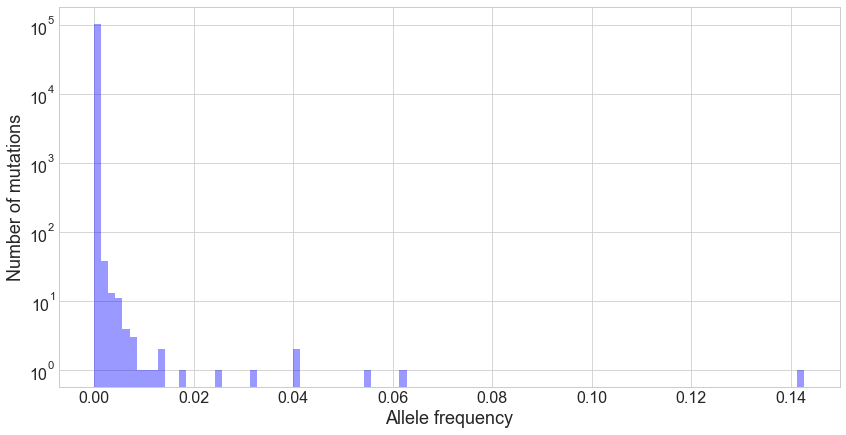

In [10]:
large_N_af = large_N_data_sampled["sampled_AF"]
sns.distplot(large_N_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='b')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Allele frequency spectrum for large_N Population');
plt.yscale('log');
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-AF_spec.png");
plt.show()

## Allele frequency spectrum for Population with Selection

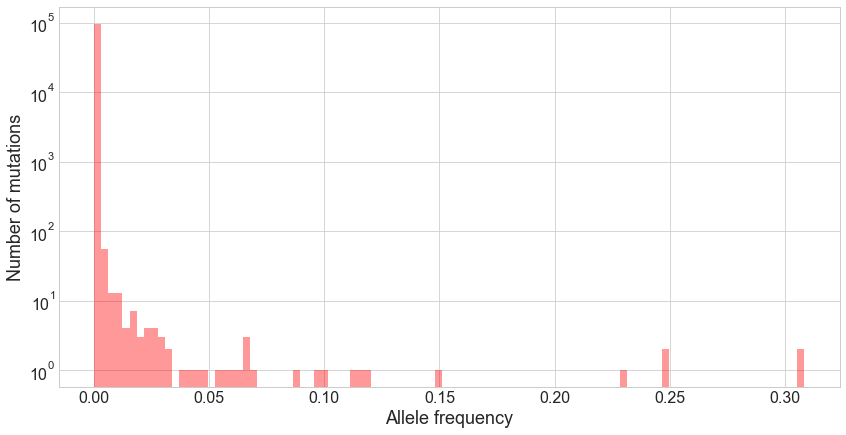

In [11]:
large_S_af = large_S_data_sampled["sampled_AF"]
sns.distplot(large_S_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='r')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Sampled Allele frequency spectrum for large_S Population');
plt.yscale('log');
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of inverse allele frequency


R^2 = 0.9850418380892325


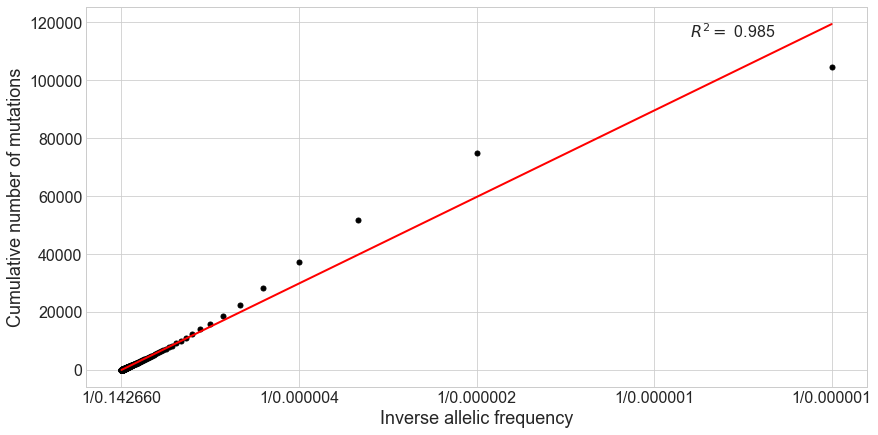


R^2 = 0.9810261424895464


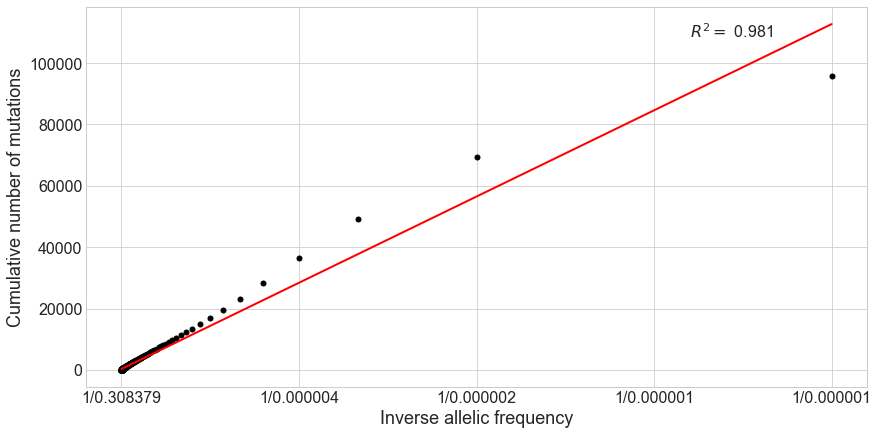

In [12]:
fit_large_N_af_r_value = fit_cumulative_mutations(large_N_data_sampled, sampled=True, plot=True)
print("\nR^2 =", fit_large_N_af_r_value)
#plt.title("Cumulative number of mutations for large_N population");
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-Cum_num_M.png");
plt.show()

fit_large_S_af_r_value = fit_cumulative_mutations(large_S_data_sampled, sampled=True, plot=True)
print("\nR^2 =", fit_large_S_af_r_value)
#plt.title("Cumulative number of mutations for large_S population");
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-Cum_num_M.png");
plt.show()

## Heterogeneity

0.9951395936526485 0.9973119113031481


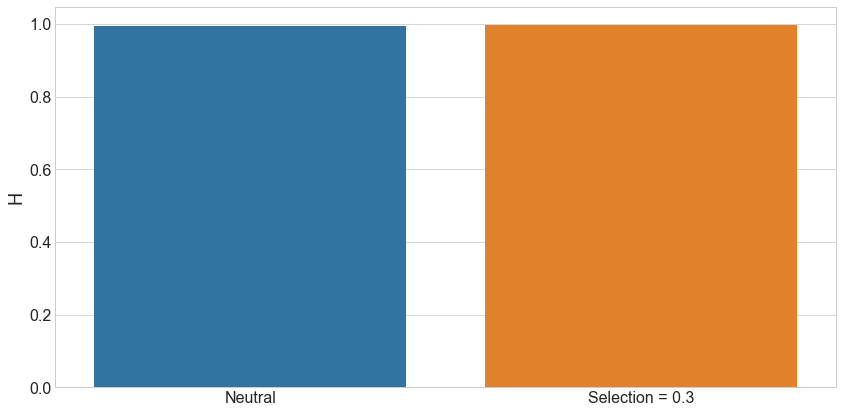

In [13]:
large_N_H = heterogeneity(large_N_data_sampled, sampled=True)
large_S_H = heterogeneity(large_S_data_sampled, sampled=True)
print(large_N_H, large_S_H)
sns.barplot(x=[0, 1], y=[large_N_H, large_S_H]);
plt.xticks([0,1], ["Neutral", "Selection = 0.3"]);
plt.ylabel("H");
#plt.title("Comparison of Heterogeneity");
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Heterogeneity.png")
plt.show()

### Unsampled

0.9985332946975779 0.9989303433996392


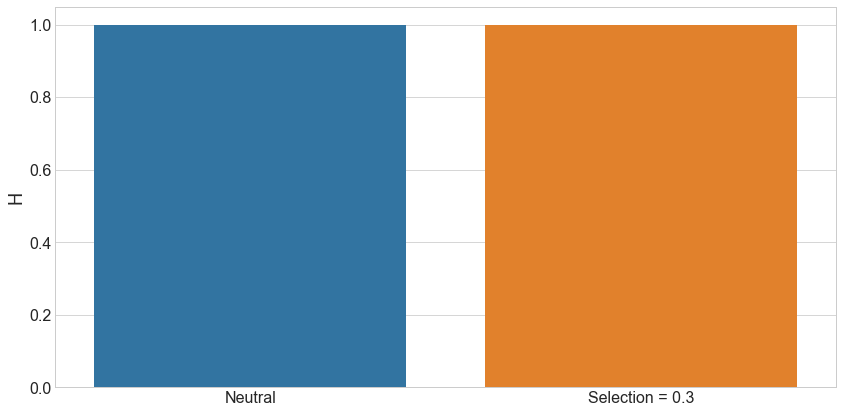

In [14]:
large_N_H = heterogeneity(large_N_data, sampled=False)
large_S_H = heterogeneity(large_S_data, sampled=False)
print(large_N_H, large_S_H)
sns.barplot(x=[0, 1], y=[large_N_H, large_S_H]);
plt.xticks([0,1], ["Neutral", "Selection = 0.3"]);
plt.ylabel("H");
#plt.title("Comparison of Heterogeneity");
plt.show()

## Distribution of number of mutations

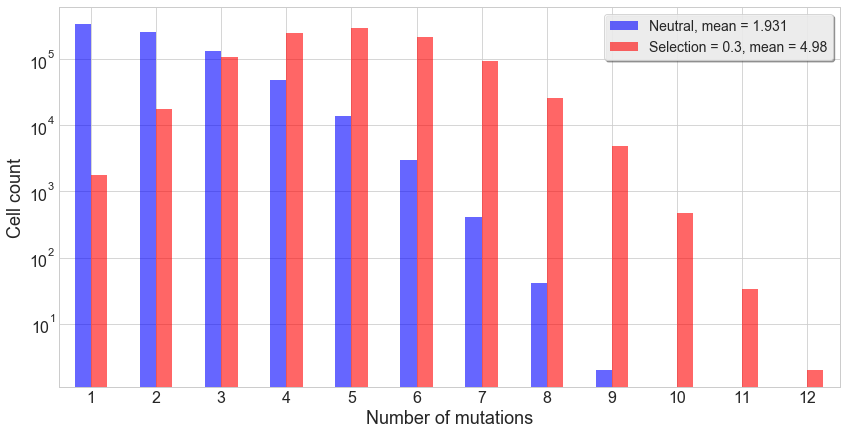

In [15]:
large_N_num_mut_df = num_mutations_distribution(large_N_data_sampled, sampled=True, det_lim=1)
large_N_avg_num_mut = avg_num_mutations(large_N_num_mut_df)
large_N_num_mut_df.columns = ["Neutral, mean = %s" %(round(large_N_avg_num_mut, 3))]
#large_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

large_S_num_mut_df = num_mutations_distribution(large_S_data_sampled, sampled=True, det_lim=1)
large_S_avg_num_mut = avg_num_mutations(large_S_num_mut_df)
large_S_num_mut_df.columns = ["Selection = %s, mean = %s" %(0.3, round(large_S_avg_num_mut, 3))]
#large_S_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = large_N_num_mut_df.join(large_S_num_mut_df, how='right')
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6);

plt.ylabel("Cell count");
plt.xlabel("Number of mutations");
#plt.title("Number of mutations distribution");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig("./Figures/Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Num_mut.png")
plt.show()